# Poisson modeling using LSTM models

In [1]:
import math
import numpy
import matplotlib.pyplot as plt
from src.poisson import Poisson
from src.lstm import LSTM
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


### Example of our Poisson process

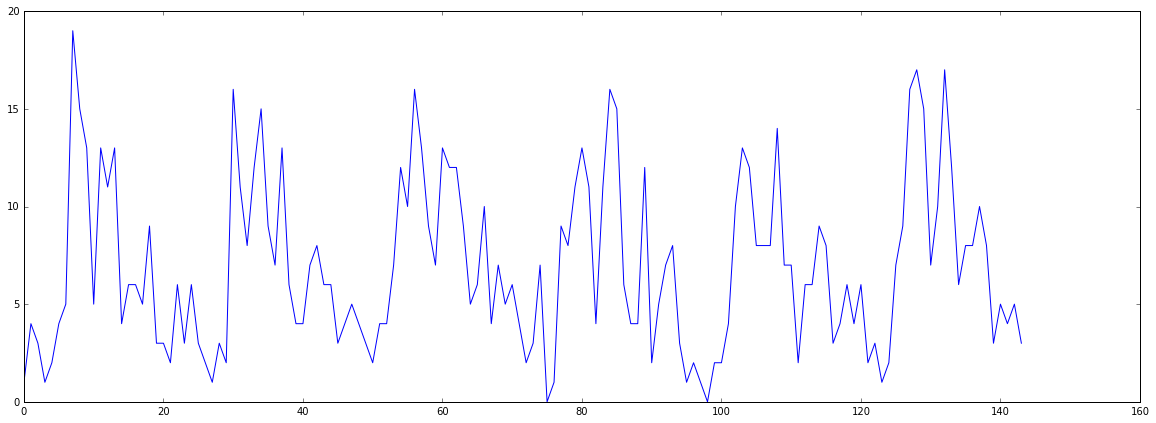

In [2]:
p = Poisson()
example = p.generate(6)

plt.figure(figsize=(20,7))
plt.plot(example)

### Train LSTM model on larger data set

In [3]:
train = p.generate(10000)
l = LSTM()
l.train(train, 10)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/10
89s - loss: 0.0075
Epoch 2/10
90s - loss: 0.0066
Epoch 3/10
101s - loss: 0.0064
Epoch 4/10
94s - loss: 0.0063
Epoch 5/10
94s - loss: 0.0062
Epoch 6/10
92s - loss: 0.0062
Epoch 7/10
92s - loss: 0.0062
Epoch 8/10
102s - loss: 0.0061
Epoch 9/10
94s - loss: 0.0061
Epoch 10/10
91s - loss: 0.0061


### Apply the LSTM model to a new data set that is more varied

In [4]:
a1 = p.generate(4)
a2 = p.generate(2,2)
a3 = p.generate(4)
a4 = p.generate(1,2)
actual = numpy.concatenate((a1,a2,a3,a4))

pred = l.predict(actual)

### Plot the prediction

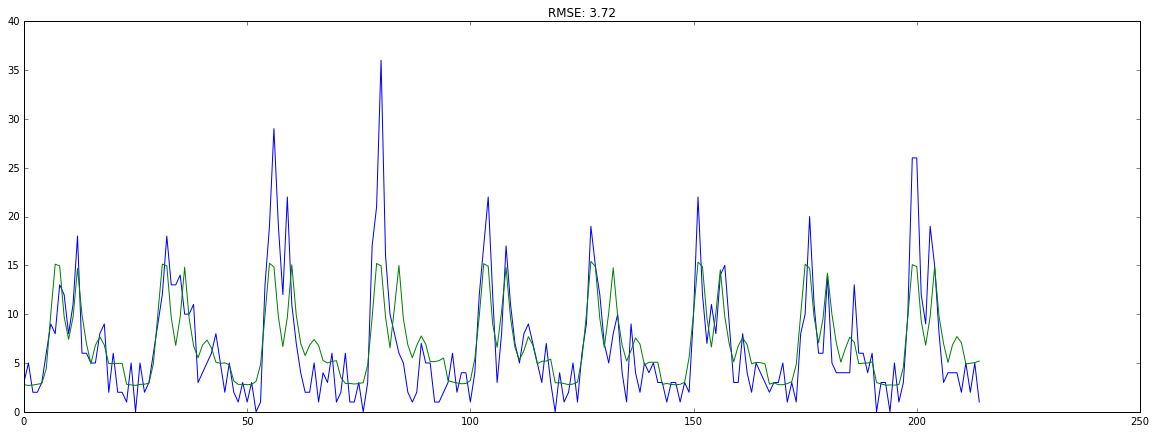

In [5]:
actual = actual[48:-1]
error = math.sqrt(mean_squared_error(pred, actual))

plt.figure(figsize=(20,7))
plt.title('RMSE: {:.2f}'.format(error))
plt.plot(actual)
plt.plot(pred)

The moral of the story is that the look-back distance needs to be at least the number of samples in a cycle, the number of LSTM units tends to be better if it is larger, and the number of samples in the training set should be as large as possible to account for adequate variability.  The training time is quite long, and the ability to adapt to data that is significantly different than the patterns it has already seen is limited.  However, the execution time for a known model is fast.  This method does not track with new changes to the data since it is a one-time training on existing pattern examples.  This method also has the problem that we may not know the extrema of the data we need to train for.  It is hard to optimize the training without knowing this, and the result is unstable if new data is outside this range.  As you can see in the above figure, when trained on data that is smaller than the range of the test data, the output saturates and yields poor results.